# Boris particle pusher in electromagnetic field
\begin{align}
\textbf{x}^{n+1}=\textbf{x}^n+\Delta t\textbf{v}^{n+1/2} \\
\textbf{v}^{n+1/2}=\textbf{u}^\prime+q^\prime\textbf{E}^{n} \\
\textbf{u}^\prime=\textbf{u}+(\textbf{u}+(\textbf{u}\times\textbf{h}))\times\textbf{s} \\
\textbf{u}=\textbf{v}^{n-1/2}+q^\prime\textbf{E}^n \\
\textbf{h} = q^\prime\textbf{B}^n \\
\textbf{s}=2\textbf{h}/(1+h^2) \\
q^\prime=\Delta t\frac{q}{2m}
\end{align}

Text(0.5,0,'z')

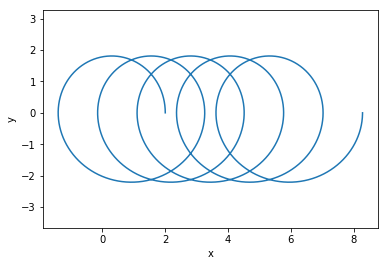

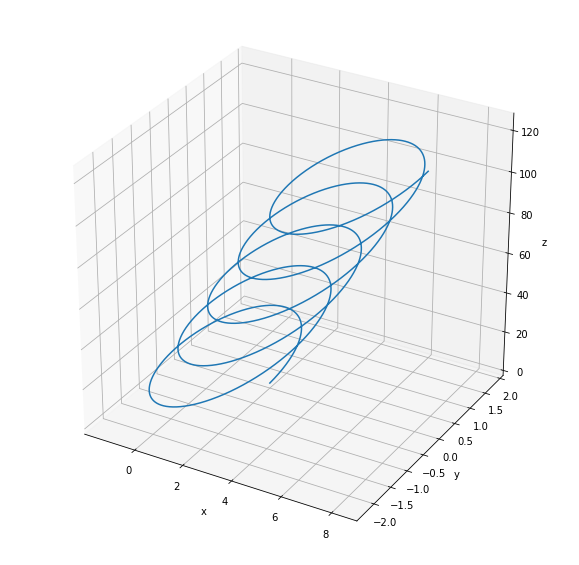

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d




# ... parameters
q = -1                   # ... charge of particle
m = 1                    # ... mass of particle
T = 10*2*np.pi           # ... simulation time
Nt = 10000               # ... number of time steps
dt = T/Nt                # ... time step
B0x0 = 0.5               # ... field at x = 0 for magnetic mirror
a = 0                    # ... inhomogeneity factor of magnetic mirror
Omega = q*B0x0/m         # ... cyclotron frequency
# ...


# ... 
x = np.linspace(-60,60,8)
y = np.linspace(-60,60,8)
z = np.linspace(-60,60,8)
t = np.linspace(0,T,Nt+1)

X,Y = np.meshgrid(x,y)
# ...




# ... define magnetic field
def B(x,shape):
    
    if shape == 1:
        return np.array([0,0,1])
    elif shape == 2:
        return np.array([-x[0]*B0x0*a*x[2],-x[1]*B0x0*a*x[2],B0x0*(1+a*x[2]**2)])
# ...



# ... define electric field
def E(x):
    return np.array([0,0.05,0])
# ...






# ... particle positions and velocities
xp = np.zeros((Nt+1,3))
vp = np.zeros((Nt+1,3))
# ...


# ... initial velocity
vp[0] = np.array([0,1,2]) 
# ...


# ... lamor radius
rl = np.abs(m*vp[0,1]/(q*np.linalg.norm(B([0,0,0],2))))
# ...


# ... initial position
xp[0] = np.array([rl,0,0])
# ...





# ... Boris pusher from v^(n-1/2) to v^(n+1/2) and x^n to x^(n+1)
def push(xold,vold,dt,B,E):
    
    qprime = dt*q/(2*m)
    h = qprime*B(xold,2)
    s = 2*h/(1 + np.linalg.norm(h)**2)
    u = vold + qprime*E(xold)
    uprime = u + np.cross(u + np.cross(u,h),s)
    vnew = uprime + qprime*E(xold)
    xnew = xold + dt*vnew
       
    return xnew,vnew
# ...




# ... initialize velocity with -0.5*dt
vp[0] = push(xp[0],vp[0],-0.5*dt,B,E)[1]
# ...



# ... time integration
for n in range(0,Nt):
    xp[n+1],vp[n+1] = push(xp[n],vp[n],dt,B,E)
# ...
    
 


 
plt.plot(xp[:,0],xp[:,1])
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
    
        
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = fig.add_subplot(111,projection = '3d')
ax.plot(xp[:,0],xp[:,1],xp[:,2])
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')

Text(0,0.5,'y')

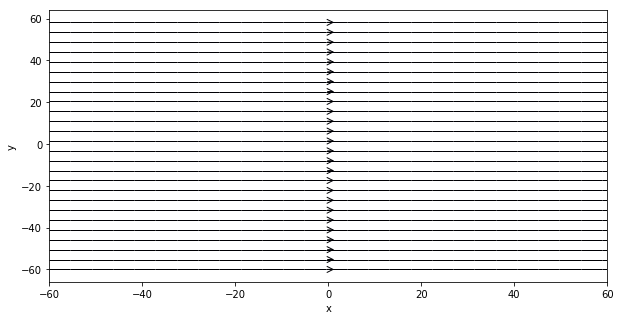

In [18]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
ax = fig.add_subplot(111)
Bx,By,Bz = Bmirror(X,Y,0)
color = np.hypot(Bx,By)
ax.streamplot(X, Y, Bx, By, color=color, linewidth=1, cmap=plt.cm.inferno, density=1, arrowstyle='->', arrowsize=1.5)
plt.xlabel('x')
plt.ylabel('y')

Text(0,0.5,'x')

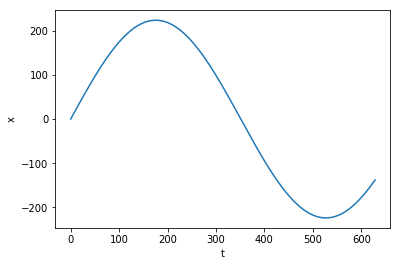

In [68]:
plt.plot(t,x_particle[:,0])
plt.xlabel('t')
plt.ylabel('x')

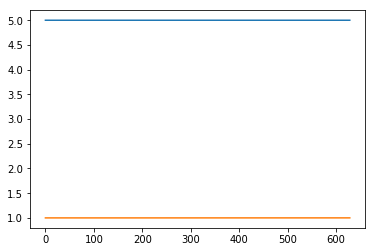

In [63]:
energy = np.zeros(Nt+1)
rho = np.zeros((Nt+1,3))
mu = np.zeros(Nt+1)

for n in range(0,Nt+1):
    energy[n] = absolutevalue(v_particle[n])**2
    rho[n] = -crossproduct(v_particle[n],np.array([0,0,1]))/Omega
    mu[n] = 1/2*m*(v_particle[n,1]**2+v_particle[n,2]**2)/absolutevalue(Bmirror(x_particle[n,0],x_particle[n,1],x_particle[n,2]))

plt.plot(t,energy)
plt.plot(t,mu)